In [1]:
# Crafting a story

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [43]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Overview of dataset:
This dataset is a collection of census data from the 1994 Census bureau database. This data collects an individuals age, work-sector, education, marital status, occupation, other identifying factors, and whether the individuals income exceeds 50k.


In [5]:
df.shape

(48842, 15)

In [23]:
# Replace ? Nan values with most frequent (mode) the only columns with Nan are Occupation, workclass and native country


In [44]:
attrib, counts = np.unique(df['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['workclass'][df['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['occupation'][df['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['native-country'][df['native-country'] == '?'] = most_freq_attrib 

In [17]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [45]:
# Switching income from <=50k to 0 and >50k to 1

df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [46]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
# What does the working age distribution look like
# Comparing capital gains/losses with those with high income
# Comparing incomes with education
# See if there is any correlation
# I would want to investigate similar data sets over different decades to see trends in education, relationships, income, age

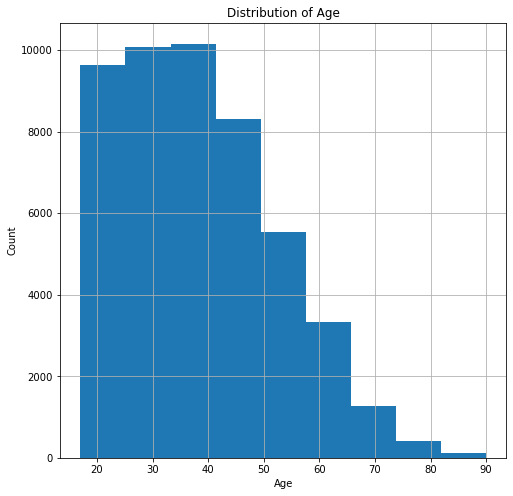

In [47]:
df['age'].hist(bins = 9, figsize = (8,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [ ]:
# Significant portion of the population is younger than fifty. Only 25% of the population working is older than 48.

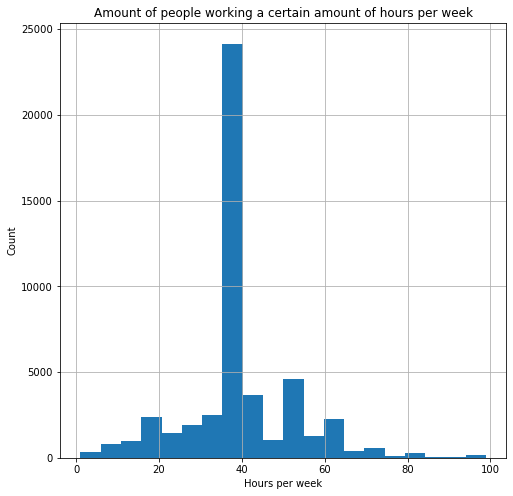

In [48]:
df['hours-per-week'].hist(bins = 20, figsize = (8,8))
plt.xlabel('Hours per week')
plt.ylabel('Count')
plt.title('Amount of people working a certain amount of hours per week')
plt.show()

In [36]:
# A significant portion of the population works between 40-45 hours a week with 50% falling into that category
# A question raised would be why are some people working less than 30 hours a week. Are they a member of a family?

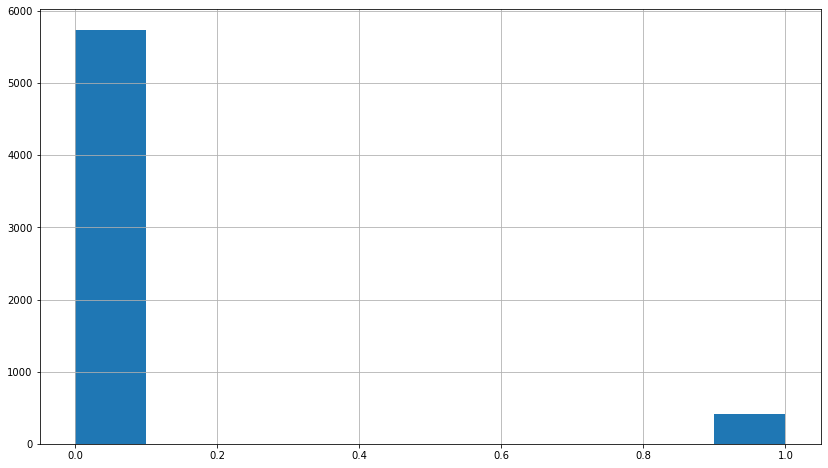

In [86]:

df_work_less = df[df['hours-per-week']< 30]
_ = df_work_less['income'].hist(figsize = (14,8))

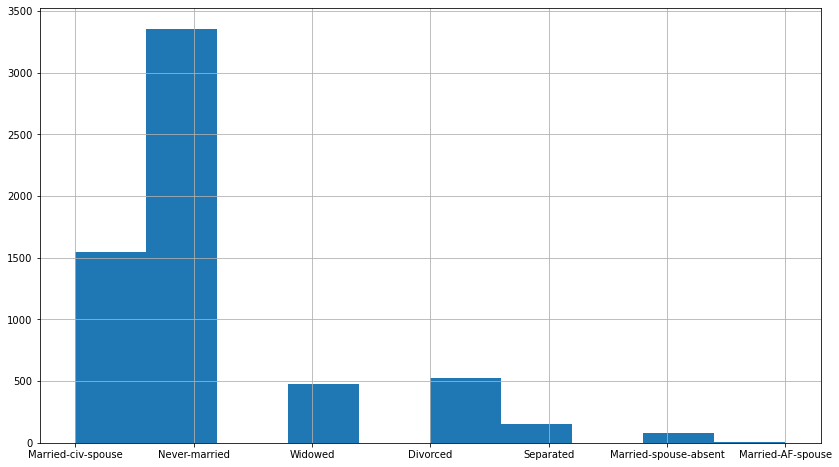

In [85]:
_ = df_work_less['marital-status'].hist(figsize = (14,8))

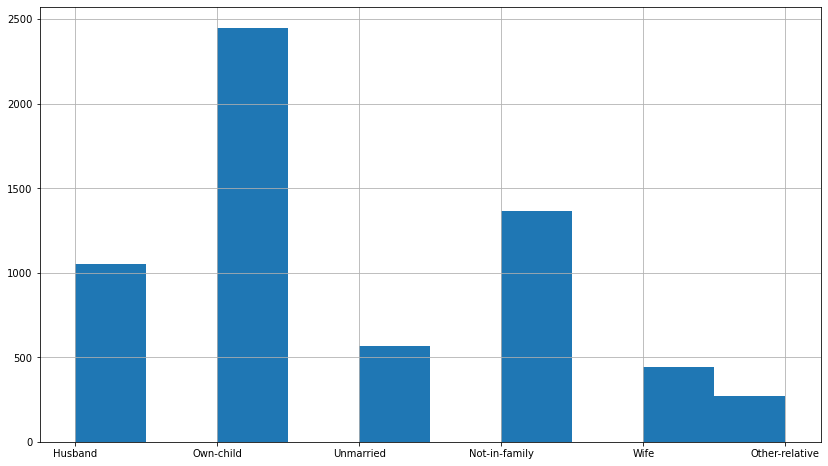

In [87]:
_ = df_work_less['relationship'].hist(figsize = (14,8))

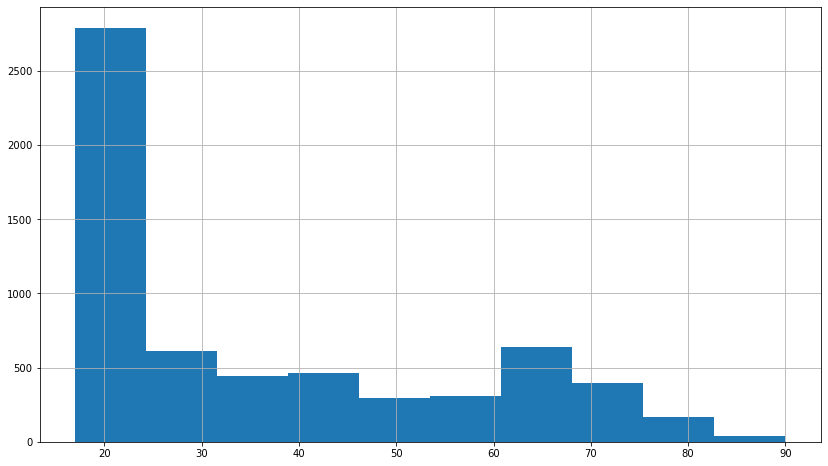

In [88]:
_ = df_work_less['age'].hist(figsize = (14,8))

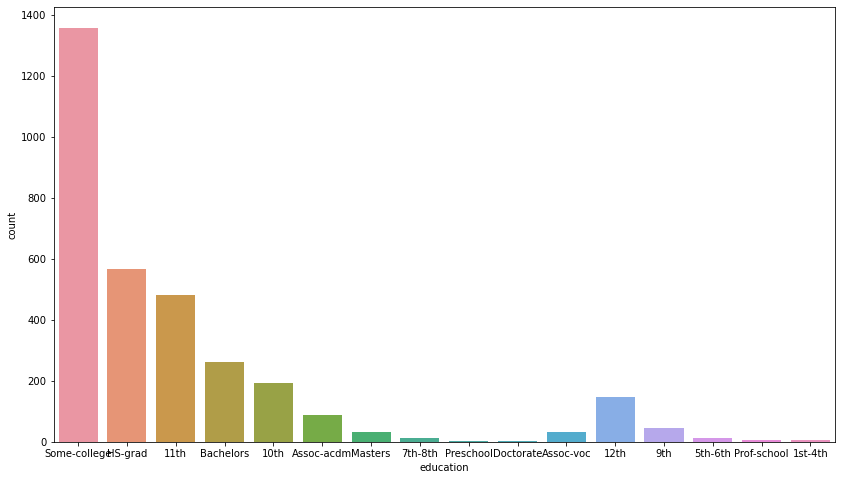

In [95]:
# Most of the people who work less than 30 hours are 30 years or younger
# Do young people have high level degrees that they are trying for?
age_work_less = df_work_less[df_work_less['age'] < 30]
plt.figure(figsize=(14,8))
ax = sns.countplot(x = 'education', data=age_work_less)
#_ = age_work_less['education'].hist(figsize = (14,8))

In [ ]:
# Large portion of those 30 and younger who work less than 30 hours a week have some college experience as well as are high
# school grads.

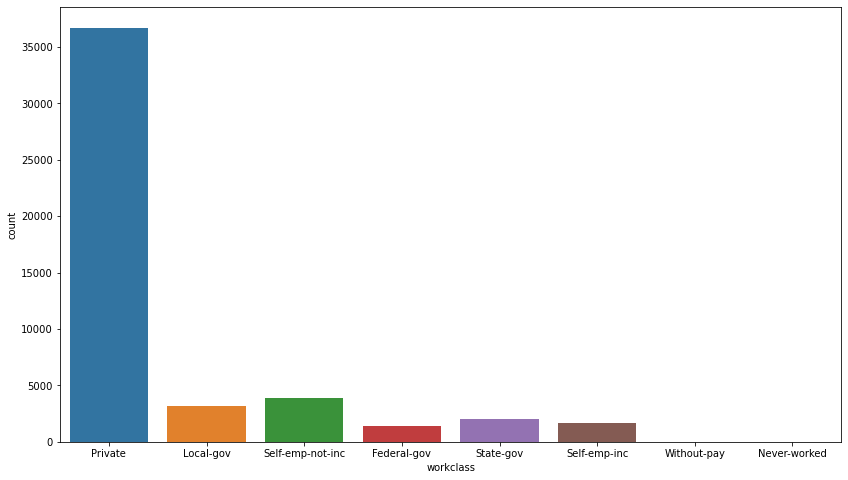

In [96]:
plt.figure(figsize=(14,8))

#total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", data=df)
plt.show()

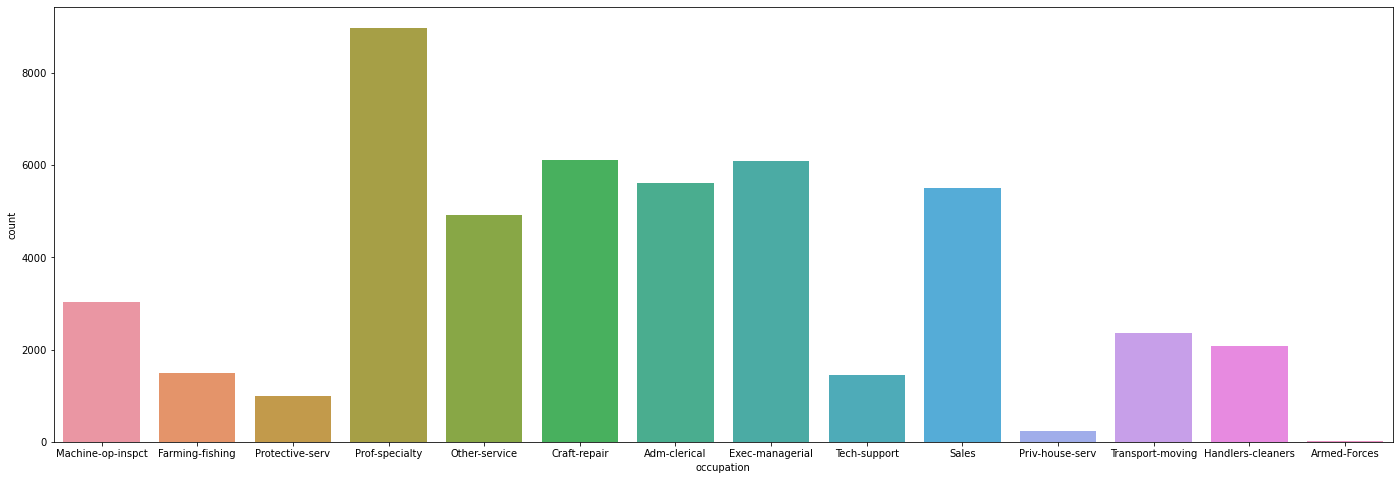

In [100]:
plt.figure(figsize = (24,8))
ax = sns.countplot(x= 'occupation', data = df)
plt.show()

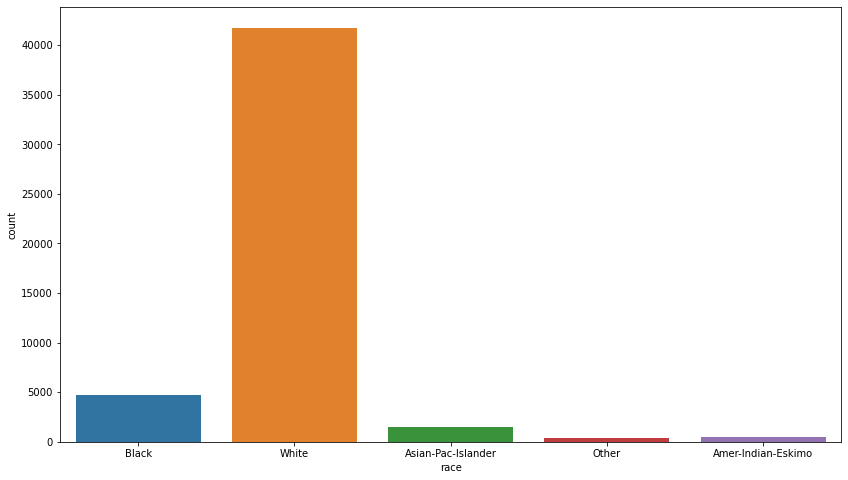

In [101]:
plt.figure(figsize = (14,8))
ax = sns.countplot(x = 'race', data = df)
plt.show()

In [102]:
df['race'].value_counts()
# Total people is 48,842 people surveyed with the percentage of white people at 85% which is higher than the expected 
# demographic in the USA in 1994. This indicates some level of bias in the data sampling that we can try to improve in
# future surveys to more accurately portray the population.

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

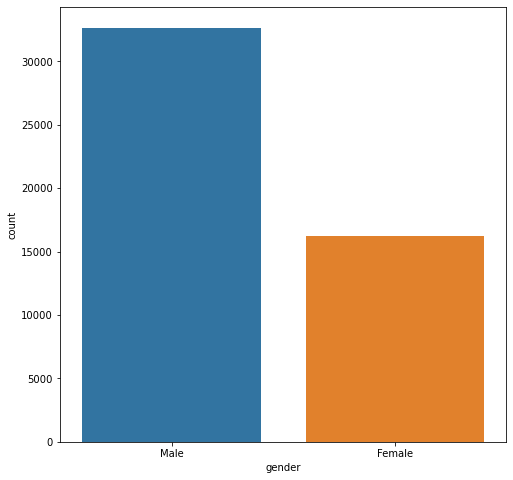

In [104]:
plt.figure(figsize = (8,8))
ax = sns.countplot(x = 'gender', data = df)
plt.show()

In [105]:
df['gender'].value_counts()
# This also heavily skewed towards males in the survey

Male      32650
Female    16192
Name: gender, dtype: int64

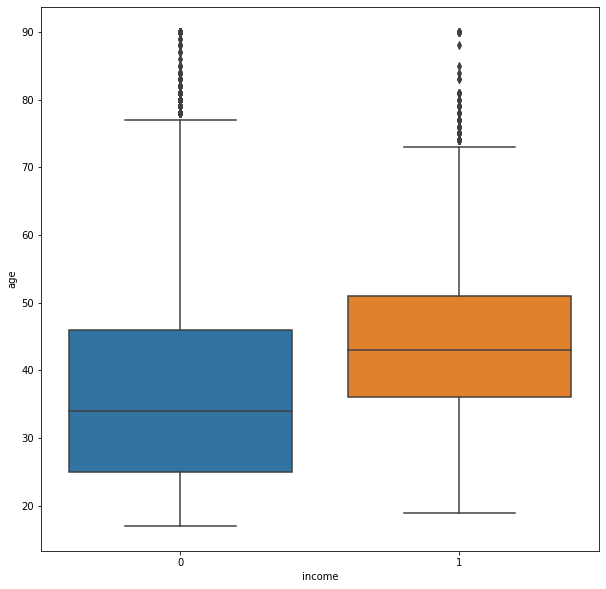

In [106]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=df)
plt.show()

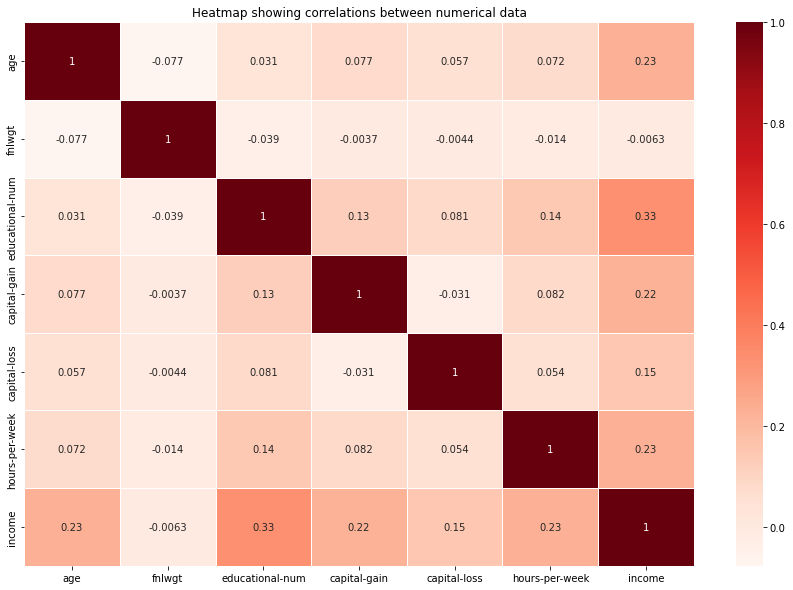

In [109]:
# Checking for any correlation between numerical data
df_num = df.drop(["educational-num","income"], axis=1)

plt.figure(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Reds")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [ ]:
# Income correlates slightly with age, educational num and capital gain and loss, as well as hours per week. However the other 
#attributes do not have any strong correlation with capital gain/hours per week with the strongest at 0.082